In [1]:
import pandas as pd
import numpy as np
import time
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
plt.style.use('ggplot')
import keys

In [2]:
auth = tweepy.OAuthHandler(keys.consumer_key, keys.consumer_secret)
auth.set_access_token(keys.access_token, keys.access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
def followers_id_to_csv(screen_name, page=20):
    followers_id = []
    for page in tweepy.Cursor(api.followers_ids, screen_name=screen_name).pages(page):
        followers_id.extend(page)
    df = pd.DataFrame(followers_id, columns=['follower_ID'])
    df.to_csv(f'data/{screen_name}_followers_id.csv', index = False)

In [92]:
# screen_names = ['realDonaldTrump','VP', 'UnfollowTrump','senatemajldr','JoeBiden','SenKamalaHarris','SpeakerPelosi']
# for name in screen_names:
#     followers_id_to_csv(name)

In [7]:
# load lists of follower IDs to DF
realDonaldTrump_followers_id = pd.read_csv('data/realDonaldTrump_followers_id.csv')
UnfollowTrump_followers_id = pd.read_csv('data/UnfollowTrump_followers_id.csv')
VP_followers_id = pd.read_csv('data/VP_followers_id.csv')
senatemajldr_followers_id = pd.read_csv('data/senatemajldr_followers_id.csv')
JoeBiden_followers_id = pd.read_csv('data/JoeBiden_followers_id.csv')
SenKamalaHarris_followers_id = pd.read_csv('data/SenKamalaHarris_followers_id.csv')
SpeakerPelosi_followers_id = pd.read_csv('data/SpeakerPelosi_followers_id.csv')

In [9]:
def follower_user_df_to_pickle(follower_ids,screen_name):
    followers_user_objects = []
    for i in range(0, len(follower_ids), 100):
        followers_user_objects.extend(api.lookup_users(follower_ids[i:i+100]))
    df = pd.DataFrame(followers_user_objects, columns=['user'])
    df.to_pickle(f'data/user_object/{screen_name}_followers_user.pkl')

In [4]:
# save user objects df to pickle 

# follower_user_df_to_pickle(list(realDonaldTrump_followers_id.follower_ID),'realDonaldTrump')
# follower_user_df_to_pickle(list(UnfollowTrump_followers_id.follower_ID),'UnfollowTrump')
# follower_user_df_to_pickle(list(VP_followers_id.follower_ID),'VP')
# follower_user_df_to_pickle(list(senatemajldr_followers_id.follower_ID),'senatemajldr')
# follower_user_df_to_pickle(list(JoeBiden_followers_id.follower_ID),'JoeBiden')
# follower_user_df_to_pickle(list(SenKamalaHarris_followers_id.follower_ID),'SenKamalaHarris')
# follower_user_df_to_pickle(list(SpeakerPelosi_followers_id.follower_ID),'SpeakerPelosi')

Read user objects from pickle into dataframe

In [123]:
# realDonaldTrump_followers_user = pd.read_pickle('data/user_object/realDonaldTrump_followers_user.pkl')
# UnfollowTrump_followers_user = pd.read_pickle('data/user_object/UnfollowTrump_followers_user.pkl')
# VP_followers_user = pd.read_pickle('data/user_object/VP_followers_user.pkl')
# senatemajldr_followers_user = pd.read_pickle('data/user_object/senatemajldr_followers_user.pkl')
# JoeBiden_followers_user = pd.read_pickle('data/user_object/JoeBiden_followers_user.pkl')
# SenKamalaHarris_followers_user = pd.read_pickle('data/user_object/SenKamalaHarris_followers_user.pkl')
# SpeakerPelosi_followers_user = pd.read_pickle('data/user_object/SpeakerPelosi_followers_user.pkl')

In [125]:
def follower_info_df(df_original, screen_name):
    df = df_original.copy()
    df['created_at'] = df['user'].apply(lambda x : x.created_at)
    df['id'] = df['user'].apply(lambda x : x.id)
    df['followers_count'] = df['user'].apply(lambda x : x.followers_count)
    df['friends_count'] = df['user'].apply(lambda x : x.friends_count)
    df['statuses_count'] = df['user'].apply(lambda x : x.statuses_count)
    df['favourites_count'] = df['user'].apply(lambda x : x.favourites_count)
    df.pop('user')
    df.to_csv(f'data/follower_info/{screen_name}_follower_info.csv',index = False)
    return df

In [126]:
# realDonaldTrump_followers_info = follower_info_df(realDonaldTrump_followers_user, 'realDonaldTrump')
# UnfollowTrump_followers_info = follower_info_df(UnfollowTrump_followers_user, 'UnfollowTrump')
# VP_followers_info = follower_info_df(VP_followers_user, 'VP')
# senatemajldr_followers_info = follower_info_df(senatemajldr_followers_user,'senatemajldr')
# JoeBiden_followers_info = follower_info_df(JoeBiden_followers_user, 'JoeBiden')
# SenKamalaHarris_followers_info = follower_info_df(SenKamalaHarris_followers_user,'SenKamalaHarris')
# SpeakerPelosi_followers_info = follower_info_df(SpeakerPelosi_followers_user,'SpeakerPelosi')

### Start here after saving user info tables

In [2]:
realDonaldTrump_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('realDonaldTrump'))
UnfollowTrump_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('UnfollowTrump'))
VP_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('VP'))
senatemajldr_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('senatemajldr'))
JoeBiden_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('JoeBiden'))
SenKamalaHarris_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('SenKamalaHarris'))
SpeakerPelosi_followers_info = pd.read_csv('data/follower_info/{}_follower_info.csv'.format('SpeakerPelosi'))

In [3]:
def first_digit_counts(data, ignore_1=True):
    # get only non-zero values
    if ignore_1:
        data = data[data > 1]
    else:
        data = data[data > 0]
    first_digits = list(map(lambda x: int(str(x)[0]), data))
    
    digit = np.arange(1,10)
    empirical_counts = [first_digits.count(n) for n in digit]
    
    # Total amount
    total_count=sum(empirical_counts)
    # Make percentage
    empirical_percentage=[(i / total_count) * 100 for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_percentage, total_count, digit)

In [4]:
benford_leading_digits = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [5]:
def chisquare_test_plot(empirical_data, dist_percentage, ax, alpha=0.05, title='', ignore_1 = False):
    empirical_counts, empirical_percentage, total_count, digit = first_digit_counts(empirical_data, ignore_1 = ignore_1)
    expected_counts = [round(percent/100*total_count) for percent in dist_percentage]
    tstats, Praw = chisquare(empirical_counts, f_exp=expected_counts)
    
    rects1 = ax.bar(digit, empirical_percentage, alpha=0.8, label="Empirical Distribution",color='black', width=.5)
    ax.plot(digit, empirical_percentage, color='black', linewidth=0.8)
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)
    ax.scatter(digit, dist_percentage, s=100, c='red', zorder=2, label='Benfords distribution')
    
    if Praw <= alpha:
        title = title + f"\nAnomaly detected! P={Praw:.2f}, Tstat={tstats:.2f}" 
    else:
        title = title + f"\nNo anomaly detected. P={Praw:.2f}, Tstat={tstats:.2f}"
    empirical_percentage_round = [round(n, 2) for n in empirical_percentage]
    diff = [round(a-b, 2) for a, b in zip(dist_percentage, empirical_percentage)]
    
    title = title + f"\nEmpirical % :{empirical_percentage_round}" + f"\nDifference % :{diff}" 
        
    ax.set_title(title)
    ax.set_ylabel('Frequency (%)')
    ax.set_xlabel('Digits')
    ax.set_xticks(digit)
    ax.set_xticklabels(digit)
    ax.legend()

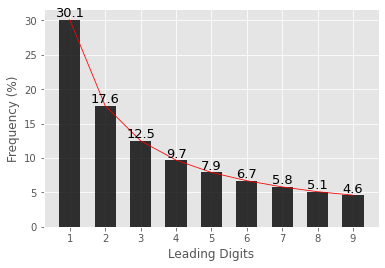

In [199]:
# plotting benford's distribution
fig, ax = plt.subplots(figsize = (6,4))
digit = list(range(1,10))
plt.style.use('seaborn-bright')
rects1 = ax.bar(digit, benford_leading_digits, alpha=0.8,color='black', width=.6)
ax.plot(digit, benford_leading_digits, color='red', linewidth=0.8)
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Leading Digits')
ax.set_xticks(digit)
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, '{:0.1f}'.format(height), ha='center', va='bottom', fontsize=13)
    #ax.scatter(digit, dist_percentage, s=100, c='red', zorder=2, label='Benfords distribution')

In [10]:
def four_plot_for_user(df, scree_name, figsize=(20, 10), ignore_1=False):
    fig, ax = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f'{scree_name} Follower\'s', fontsize=16)
    chisquare_test_plot(df.followers_count, benford_leading_digits, title='Follower Counts', ax = ax[0,0], ignore_1=ignore_1)
    chisquare_test_plot(df.friends_count, benford_leading_digits, title= 'Friend Counts', ax = ax[0,1], ignore_1=ignore_1)
    chisquare_test_plot(df.statuses_count, benford_leading_digits, title= 'Statuses Counts', ax = ax[1,0], ignore_1=ignore_1)
    chisquare_test_plot(df.favourites_count, benford_leading_digits, title= 'Favourites Counts', ax = ax[1,1], ignore_1=ignore_1)
    plt.tight_layout()
    if ignore_1:
        plt.savefig(f'image/{scree_name}_ignore_1.png')
    else:
        plt.savefig(f'image/{scree_name}_include_1.png')

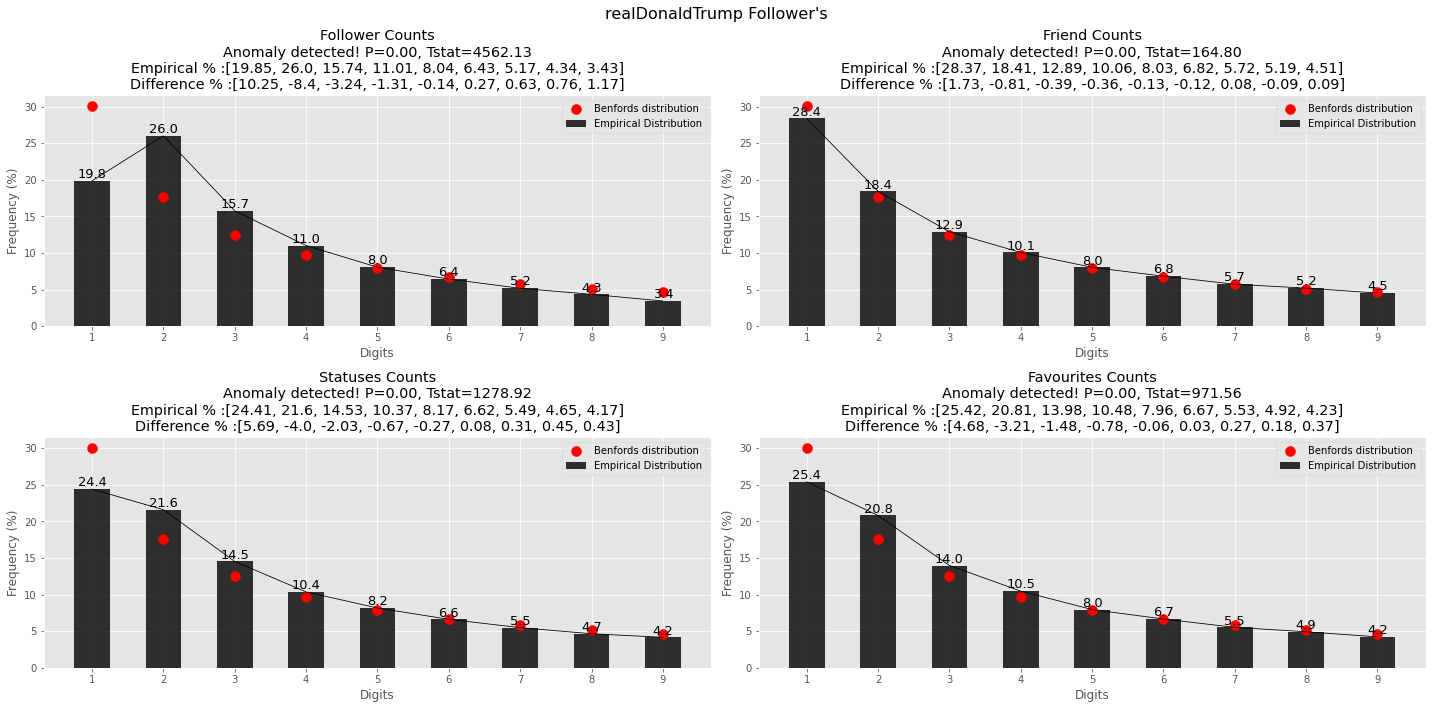

In [11]:
four_plot_for_user(realDonaldTrump_followers_info, 'realDonaldTrump', ignore_1=True)

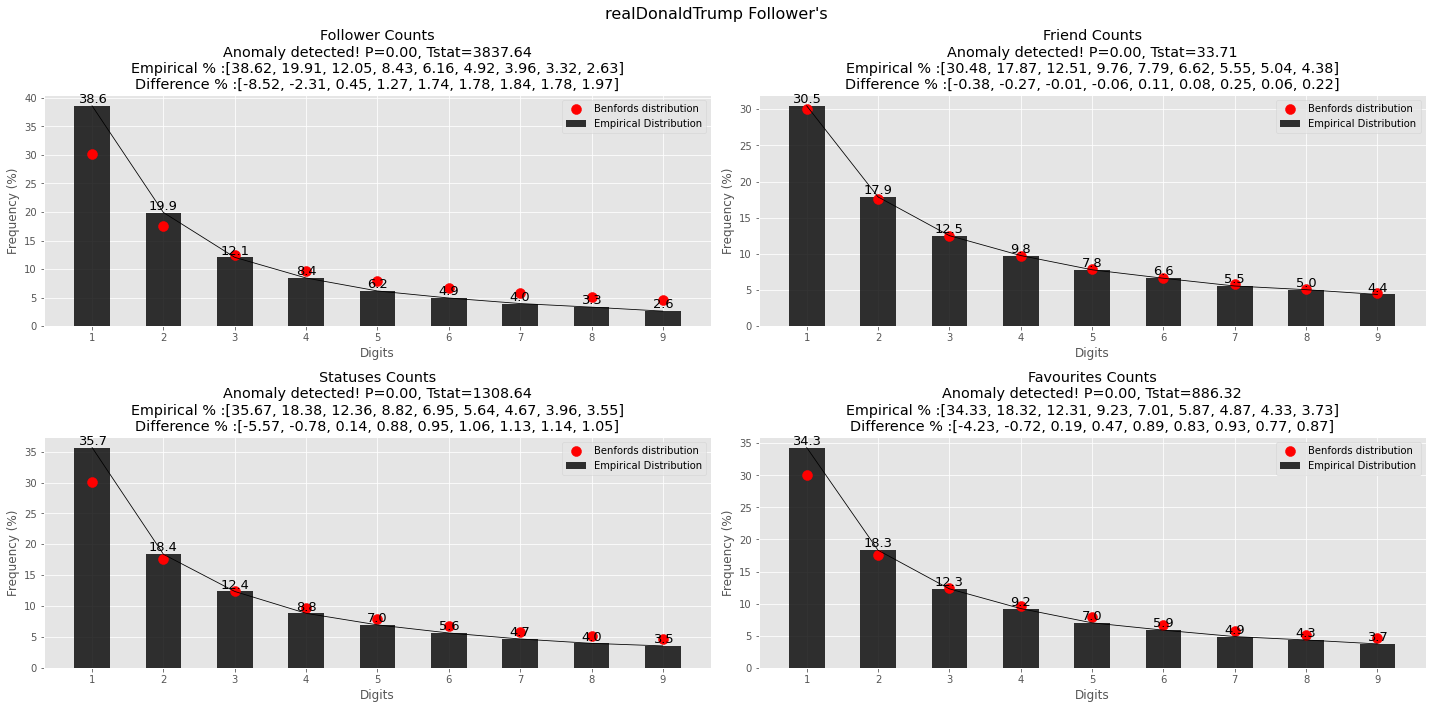

In [12]:
four_plot_for_user(realDonaldTrump_followers_info, 'realDonaldTrump', ignore_1=False)

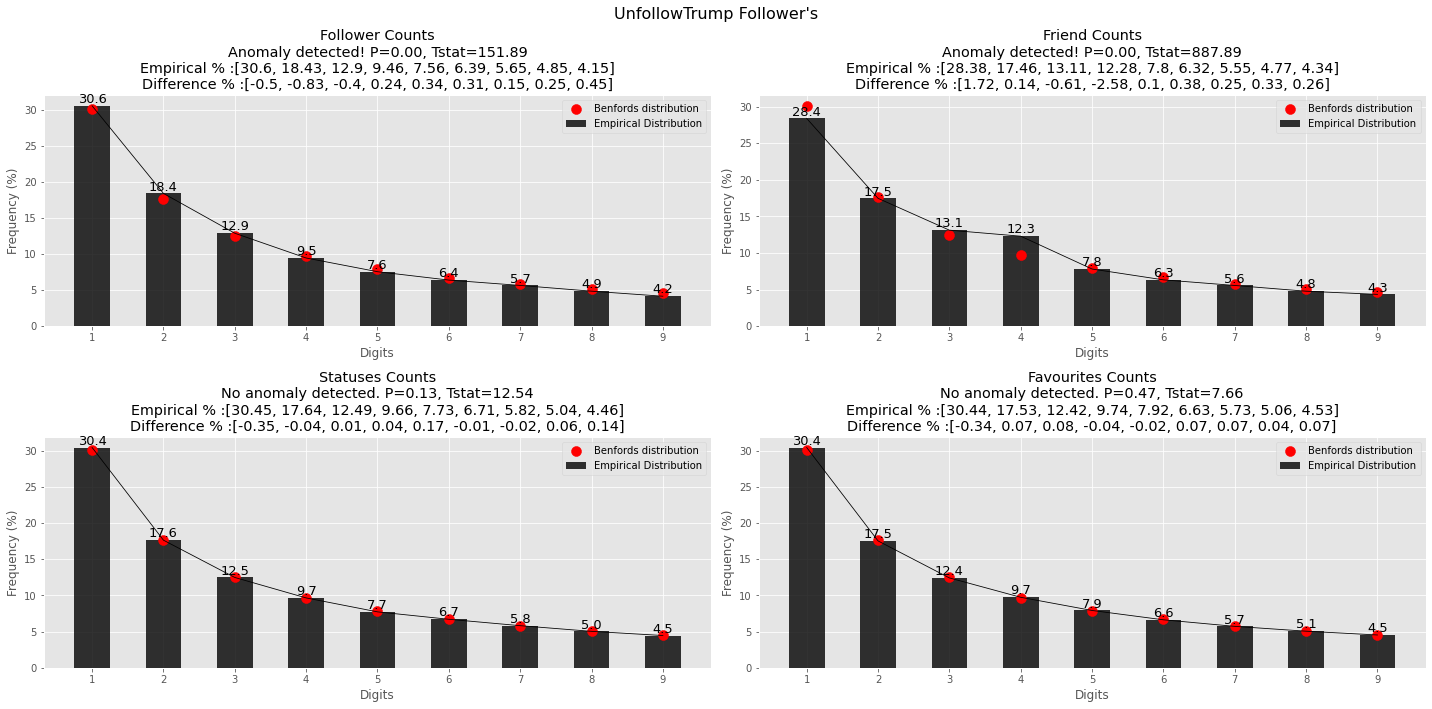

In [13]:
four_plot_for_user(UnfollowTrump_followers_info, 'UnfollowTrump', ignore_1=False)

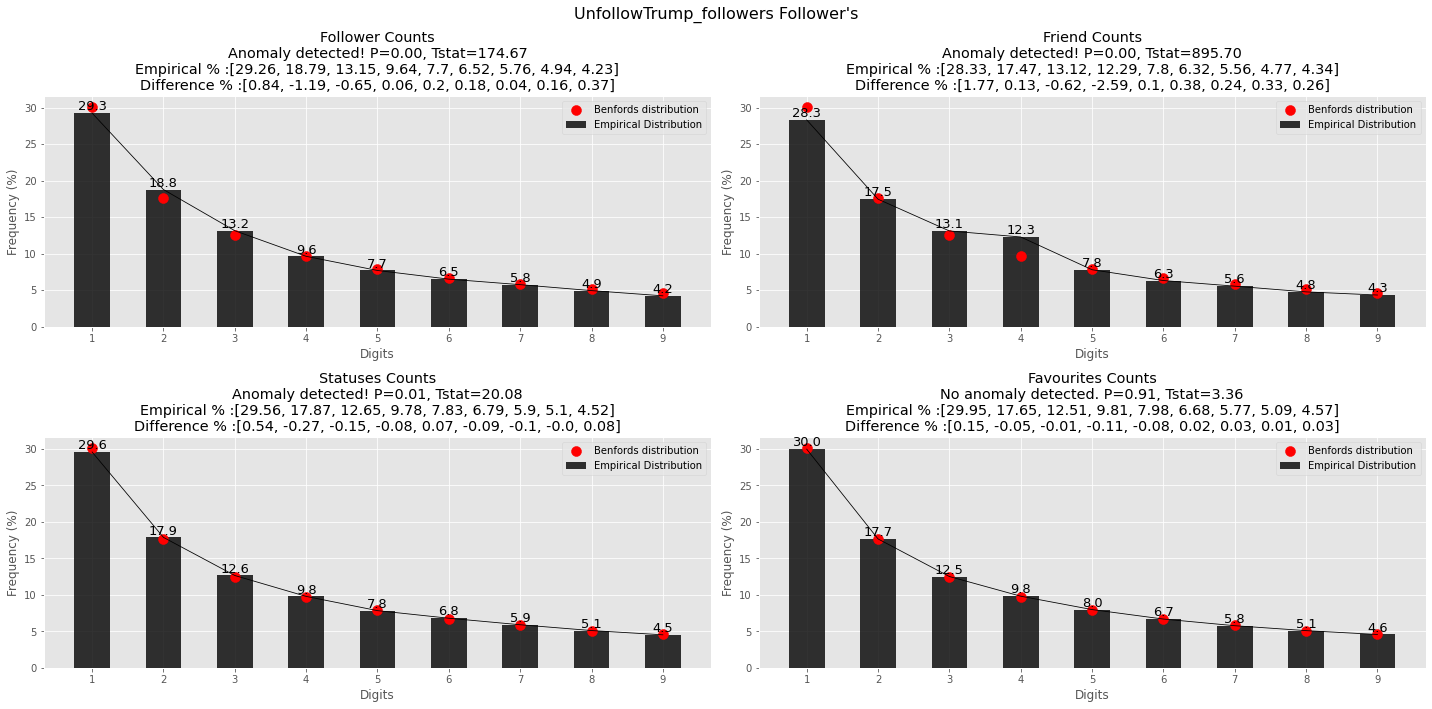

In [14]:
four_plot_for_user(UnfollowTrump_followers_info, 'UnfollowTrump_followers', ignore_1=True)

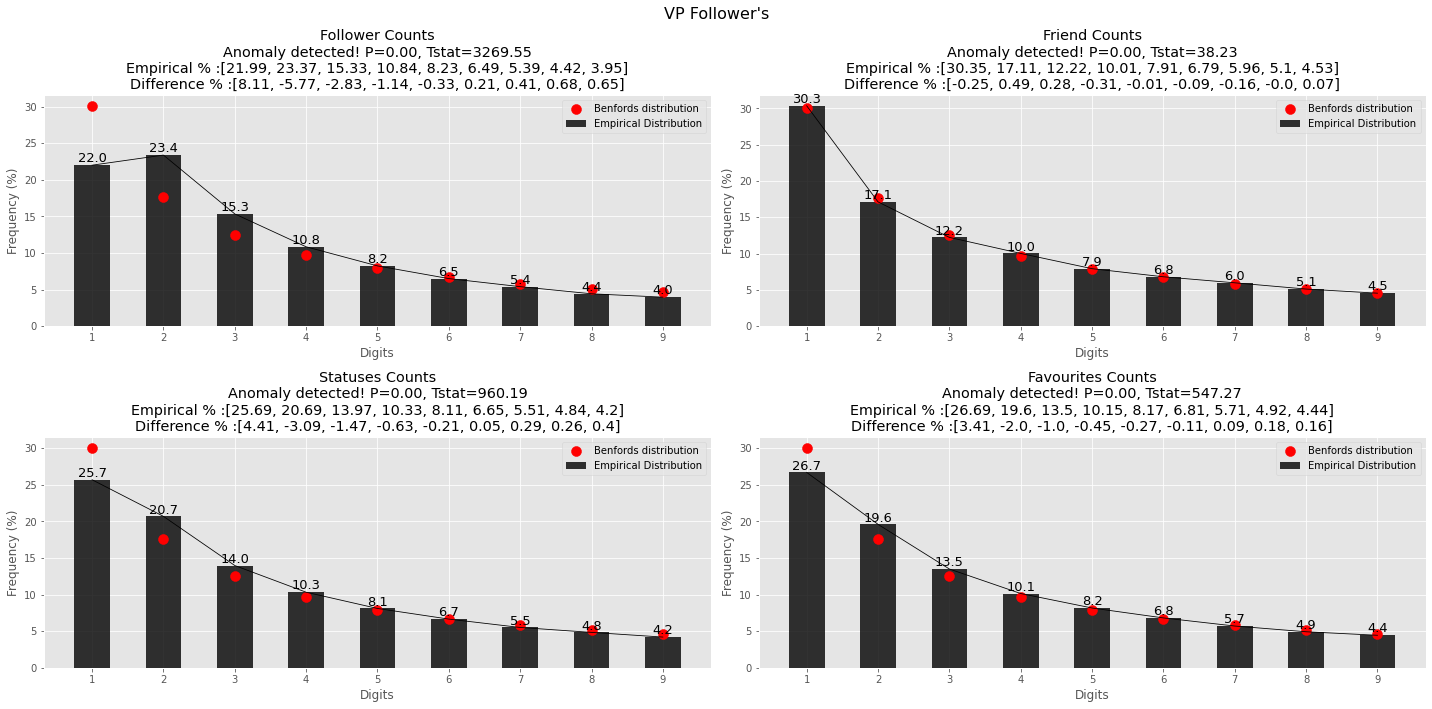

In [15]:
four_plot_for_user(VP_followers_info, 'VP', ignore_1=True)

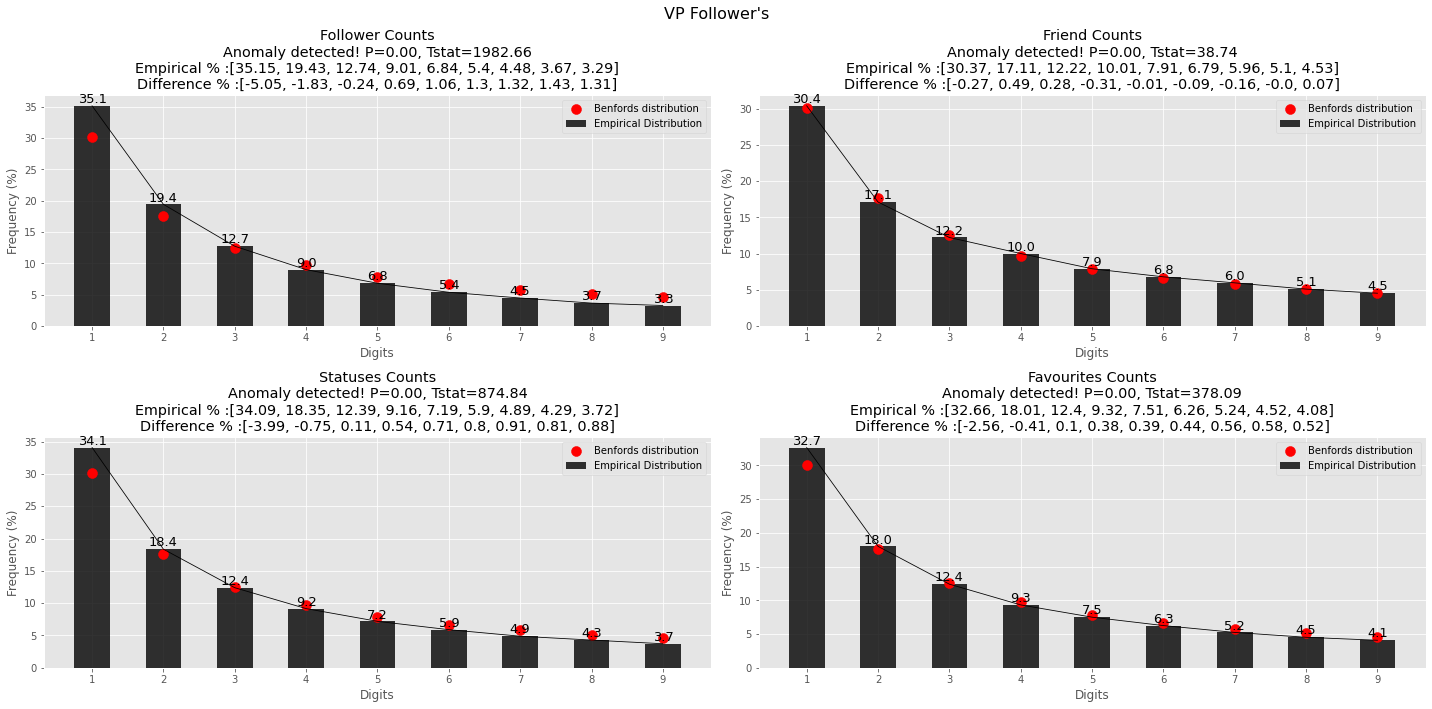

In [16]:
four_plot_for_user(VP_followers_info, 'VP', ignore_1=False)

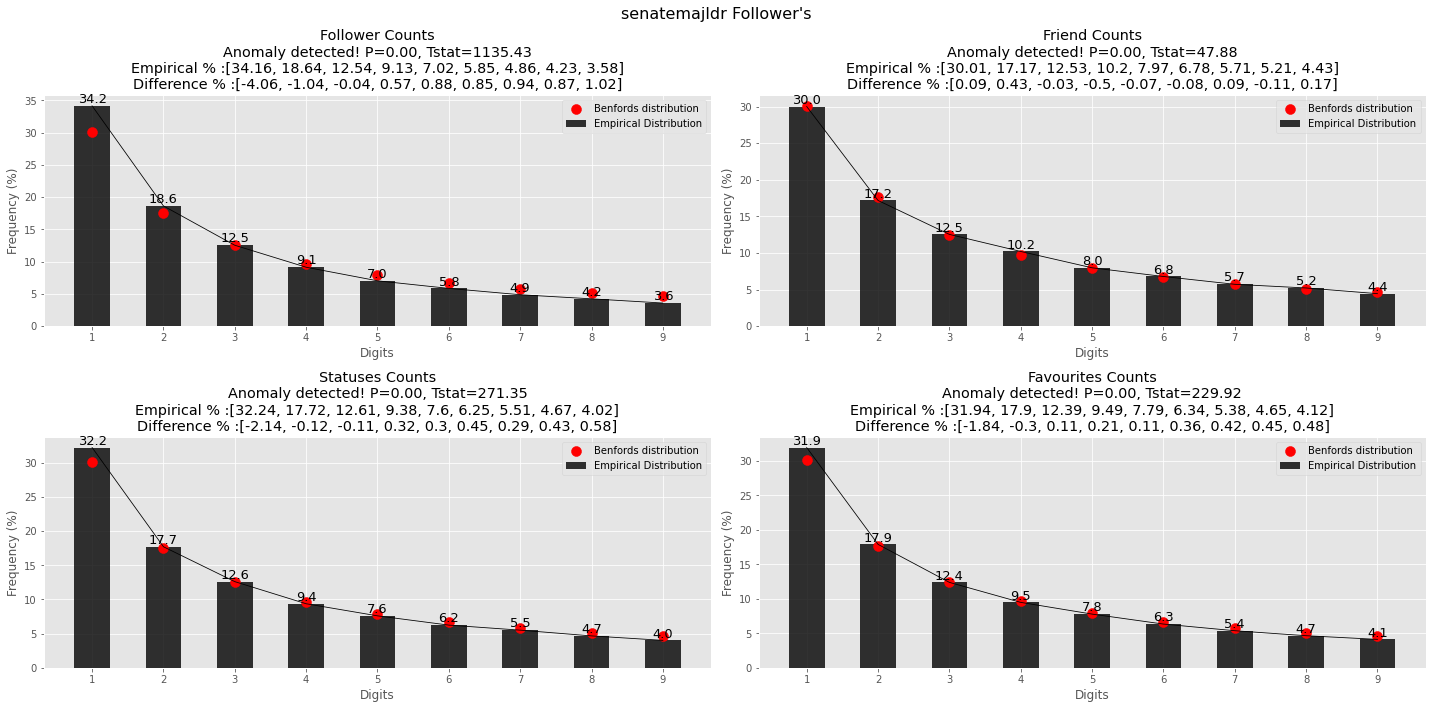

In [17]:
four_plot_for_user(senatemajldr_followers_info, 'senatemajldr', ignore_1=False)

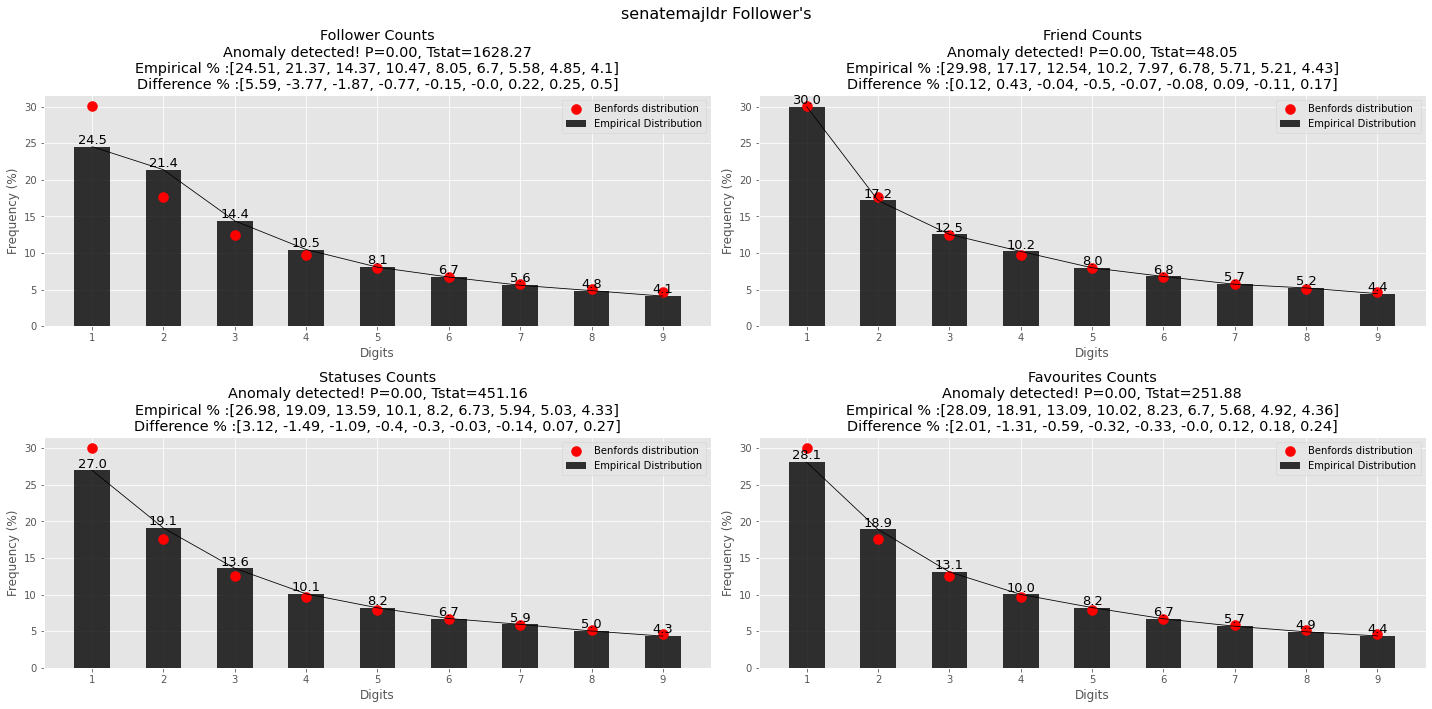

In [18]:
four_plot_for_user(senatemajldr_followers_info, 'senatemajldr', ignore_1=True)

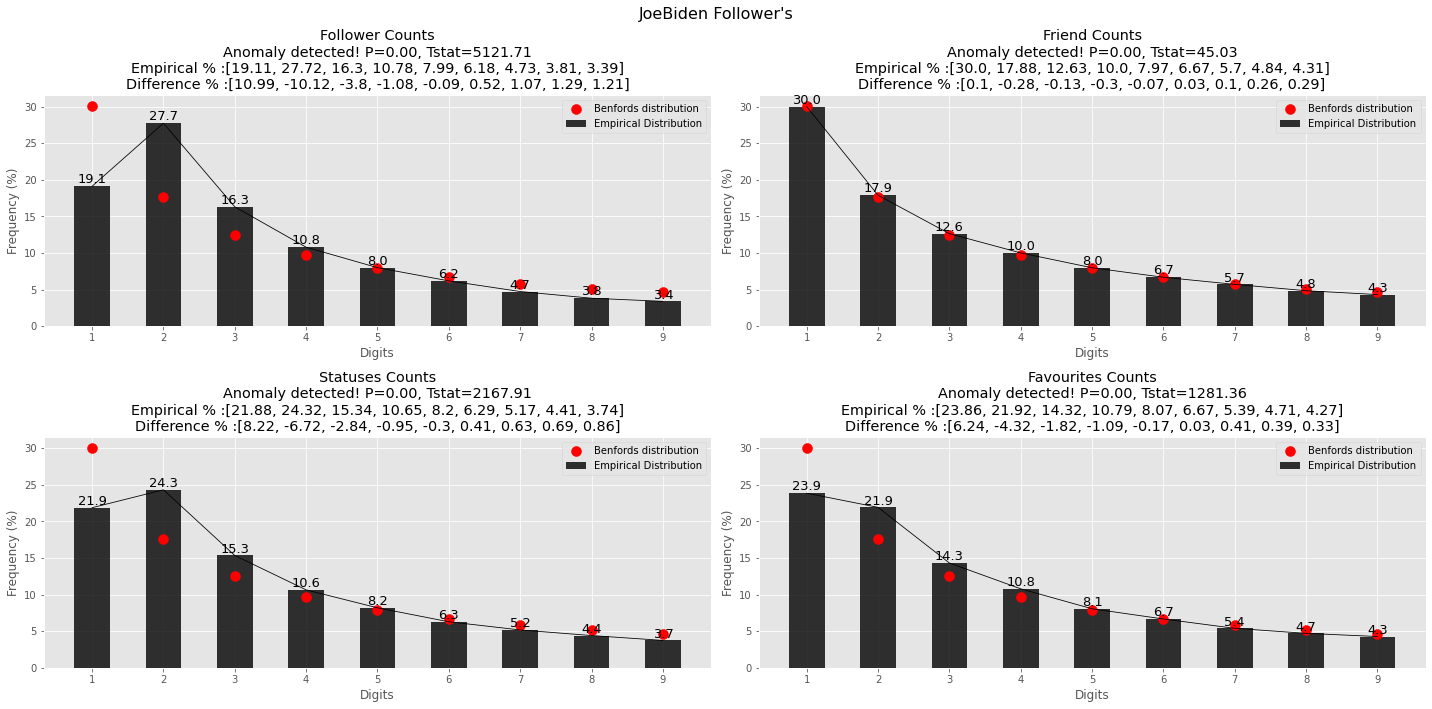

In [19]:
four_plot_for_user(JoeBiden_followers_info, 'JoeBiden', ignore_1=True)

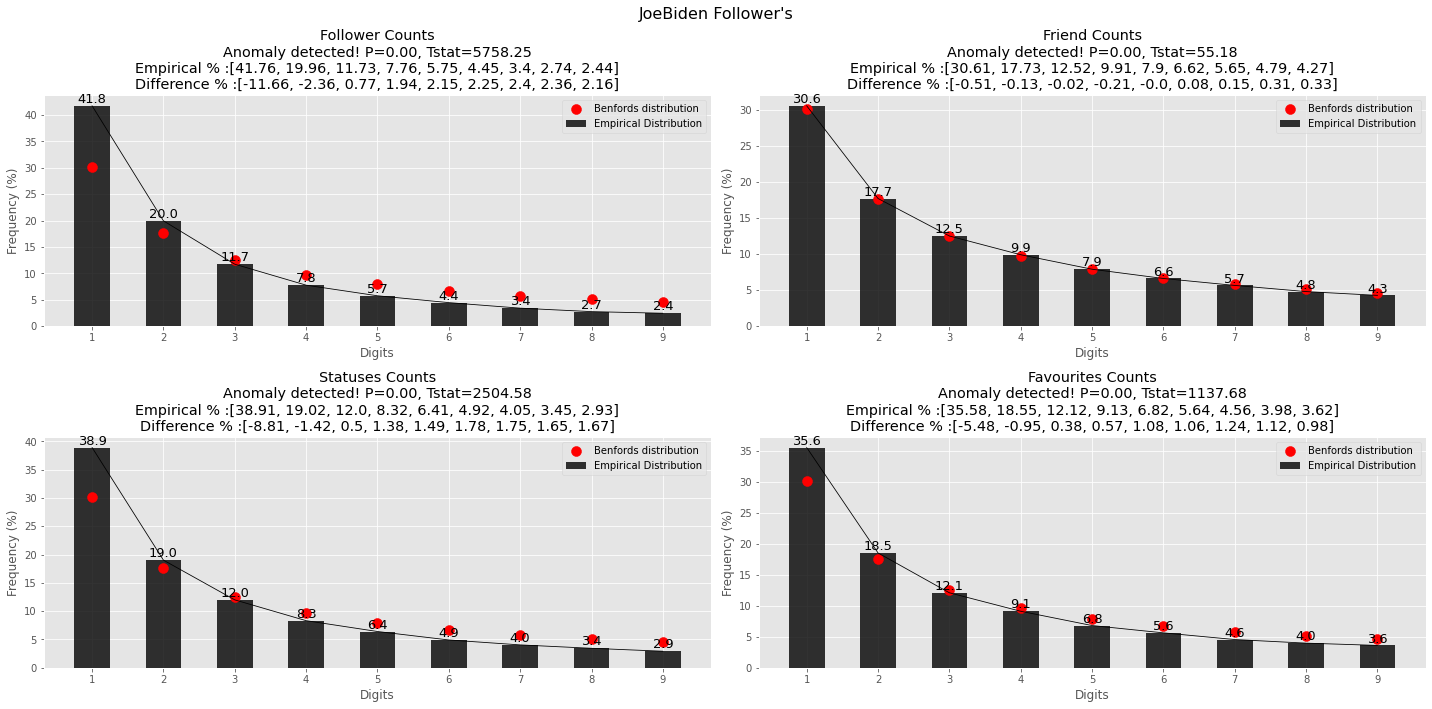

In [20]:
four_plot_for_user(JoeBiden_followers_info, 'JoeBiden', ignore_1=False)

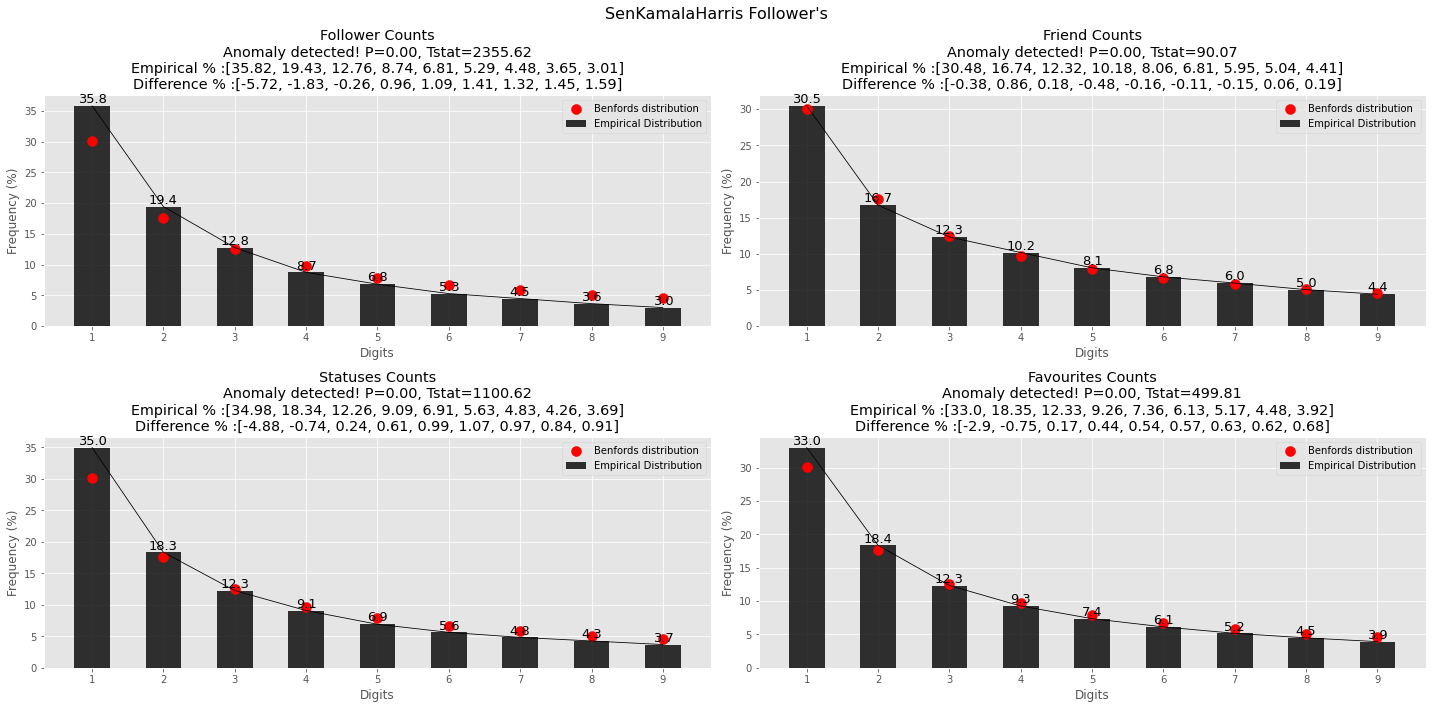

In [21]:
four_plot_for_user(SenKamalaHarris_followers_info, 'SenKamalaHarris', ignore_1=False)

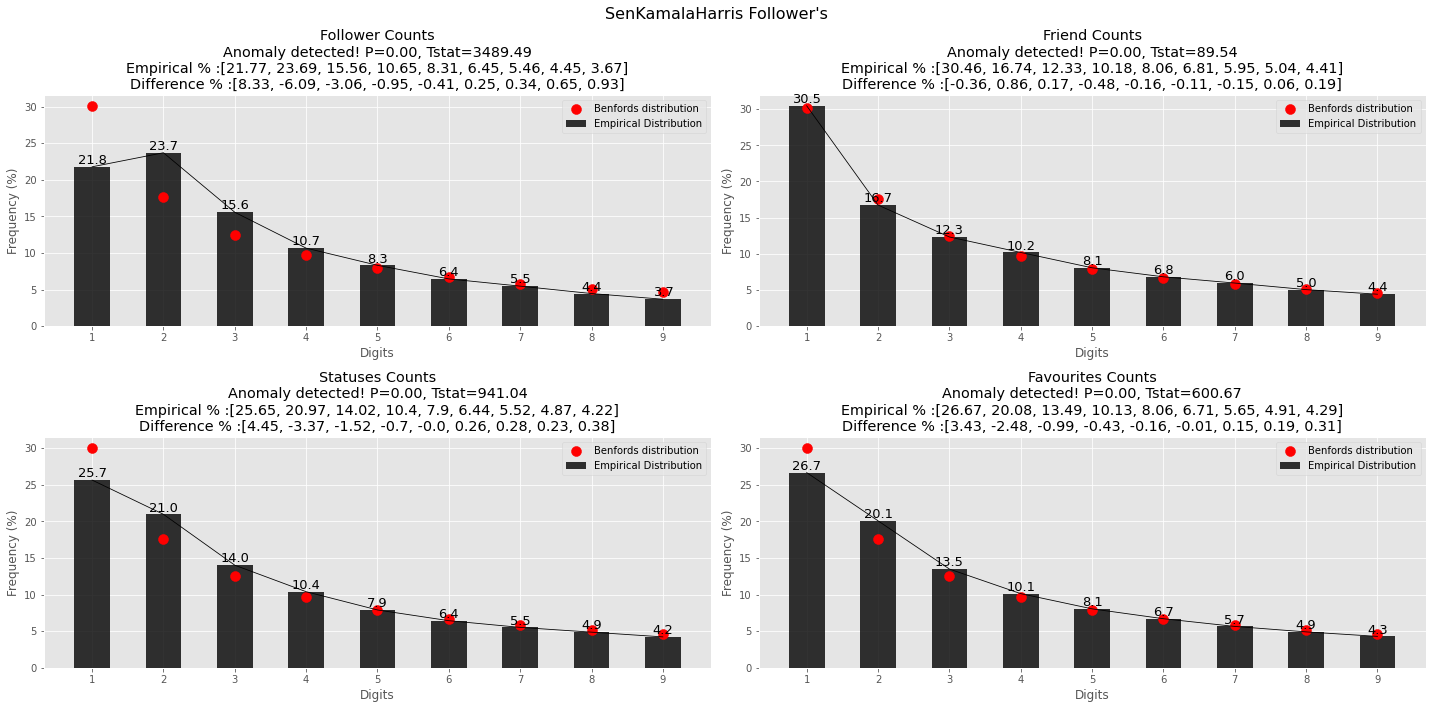

In [22]:
four_plot_for_user(SenKamalaHarris_followers_info, 'SenKamalaHarris', ignore_1=True)

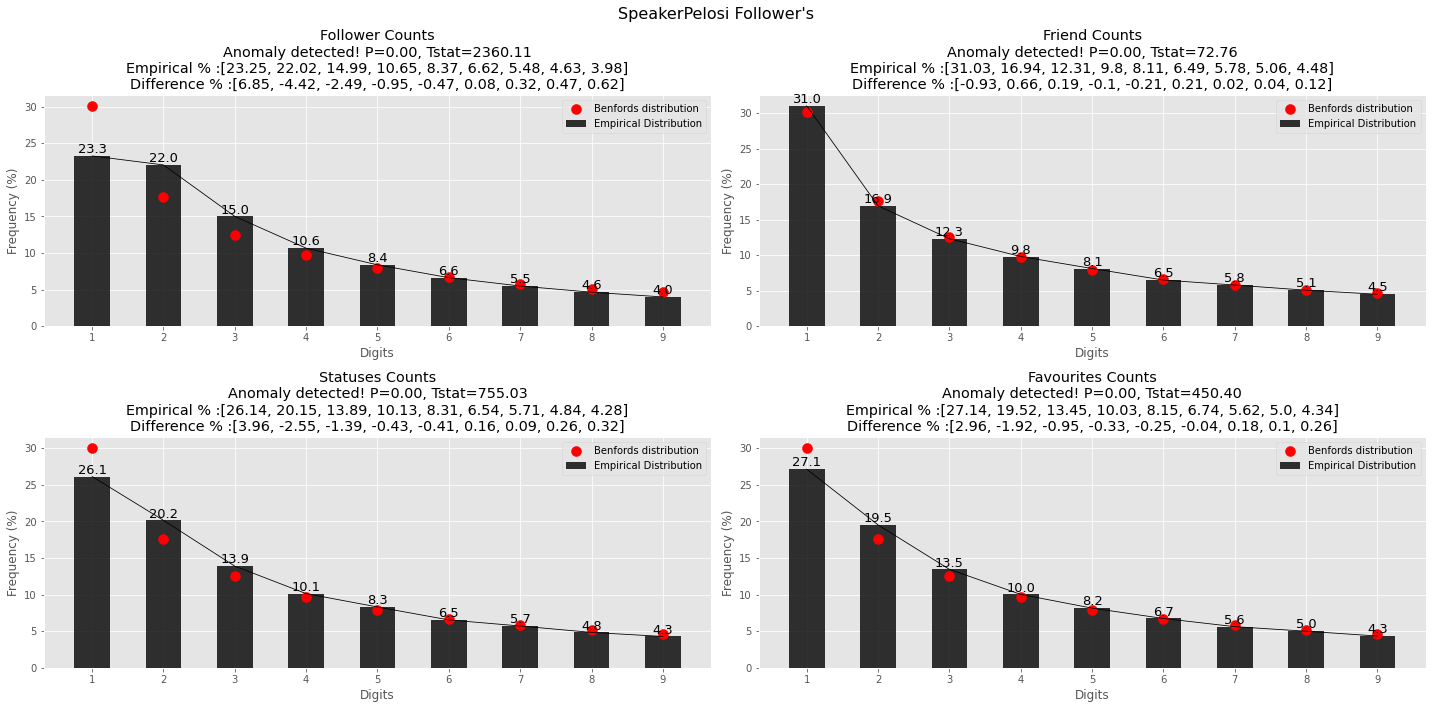

In [23]:
four_plot_for_user(SpeakerPelosi_followers_info, 'SpeakerPelosi', ignore_1=True)

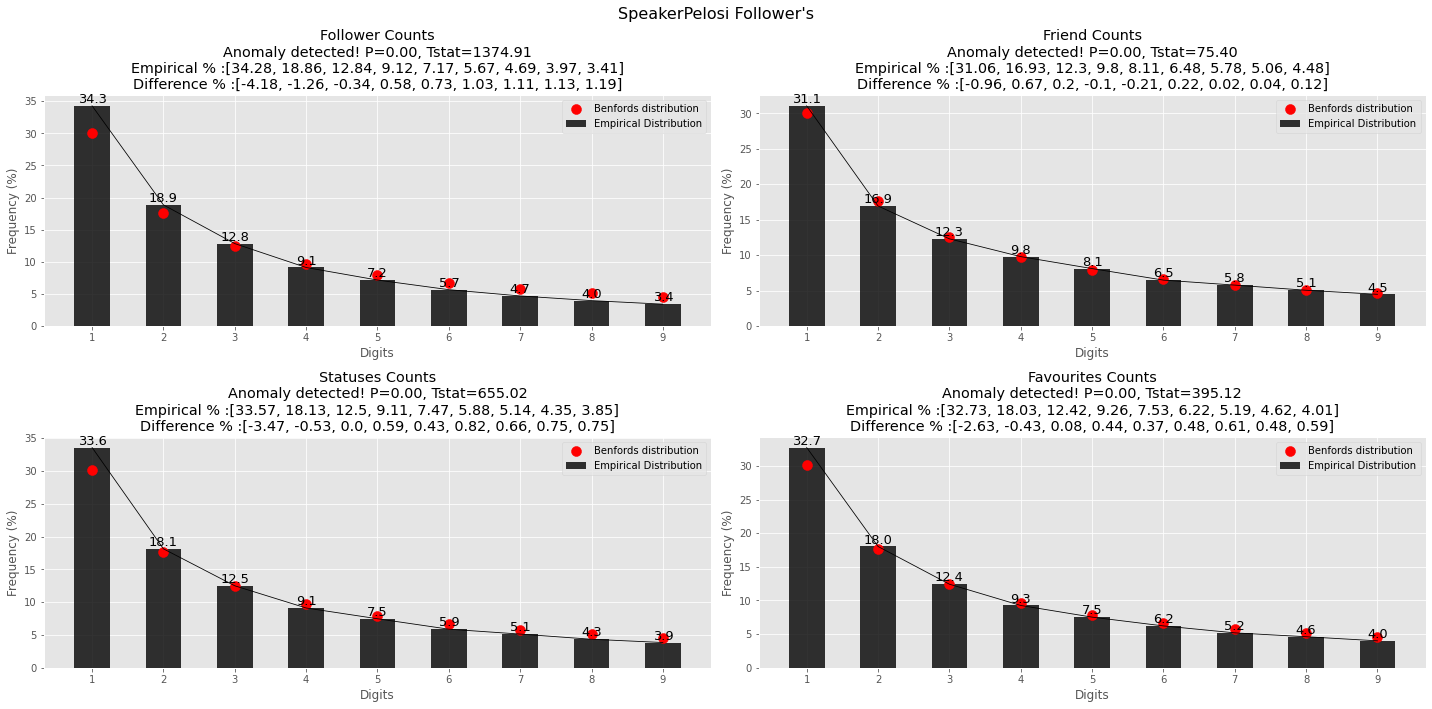

In [24]:
four_plot_for_user(SpeakerPelosi_followers_info, 'SpeakerPelosi', ignore_1=False)

In [26]:
import datetime

In [145]:
def graph_creation_date(df_og, screen_name):
    df_og['creation'] = pd.to_datetime(df_og.created_at)
    fig, ax = plt.subplots(3, 1, figsize=(20, 10))
    
    # from 2015 to now, by month
    df = df_og[df_og['creation'] > datetime.datetime.strptime('2015-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')]
    df['creation'].groupby([df['creation'].dt.year, df['creation'].dt.month]).count().plot(kind='bar', ax=ax[0])
    
    # 2020 by week
    df2 = df_og[df_og['creation'] > datetime.datetime.strptime('2020-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')]
    df2['creation'].groupby([df2['creation'].dt.year, df2['creation'].dt.isocalendar().week]).count().plot(kind='bar', ax=ax[1])
    
    df3 = df_og[df_og['creation'] > datetime.datetime.strptime('2020-11-01 00:00:00', '%Y-%m-%d %H:%M:%S')]
    df3['creation'].groupby(df3['creation'].dt.date).count().plot(kind='bar',ax=ax[2])
    
    
    fig.suptitle(f'{screen_name}\'s Follower\'s Creation Date', fontsize=16)
    plt.show()

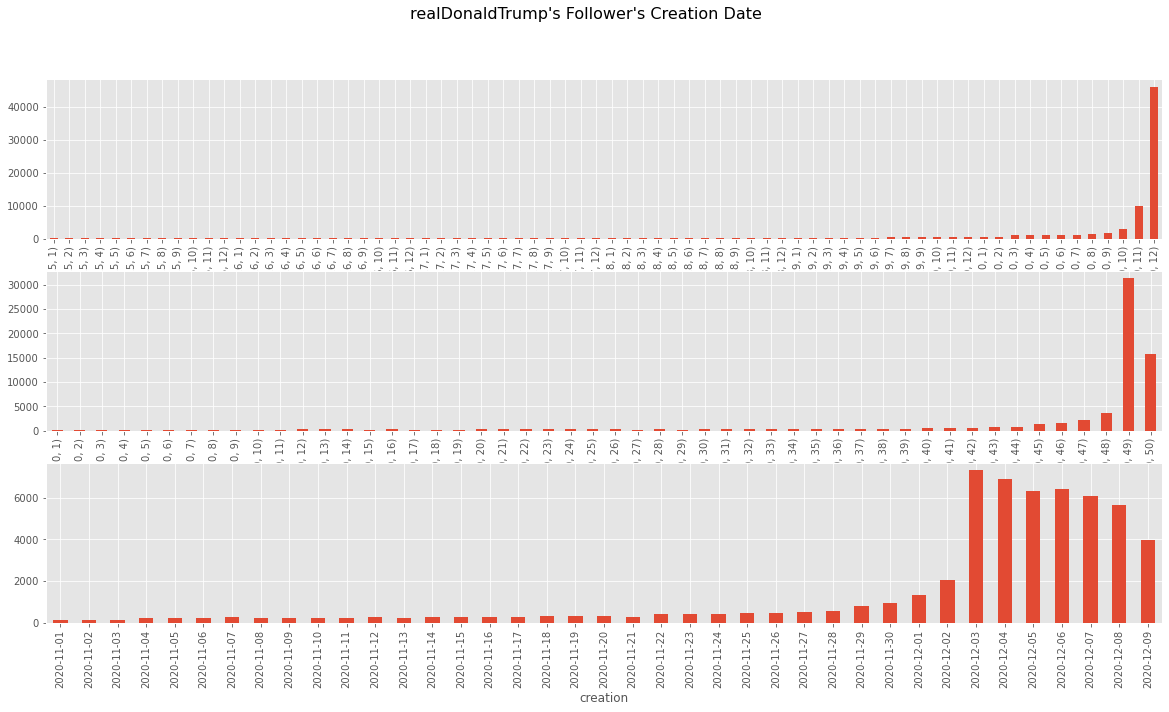

In [146]:
graph_creation_date(realDonaldTrump_followers_info, 'realDonaldTrump')

In [29]:
realDonaldTrump_followers_info['creation'].dt.year

0        2020
1        2020
2        2020
3        2020
4        2009
         ... 
99807    2018
99808    2011
99809    2019
99810    2020
99811    2014
Name: creation, Length: 99812, dtype: int64

In [58]:
def graph_creation_date_interval(df_og, screen_name):
    fig, ax = plt.subplots(figsize=(6, 5))
    df_og['creation'] = pd.to_datetime(df_og.created_at)
    interval = ['before\n2016', '2016', '2017', '2018', '2019','2020\nbefore Dec', '2020\nDec']
    y = []
    y.append(df_og[df_og['creation'].dt.year <= 2015].id.count())
    y.append(df_og[df_og['creation'].dt.year == 2016].id.count())
    y.append(df_og[df_og['creation'].dt.year == 2017].id.count())
    y.append(df_og[df_og['creation'].dt.year == 2018].id.count())
    y.append(df_og[df_og['creation'].dt.year == 2019].id.count())
    y.append(df_og[(df_og['creation'].dt.year == 2020) & (df_og['creation'].dt.month < 12)].id.count())
    y.append(df_og[(df_og['creation'].dt.year == 2020) & (df_og['creation'].dt.month == 12)].id.count())
    
    ax.bar(interval, y, color='b')
    ax.set_xlabel('account creation date')
    plt.xticks(rotation=0)
    ax.set_ylabel('number of accounts')
    ax.set_title(f'{screen_name} followers\' creation date')
    plt.savefig(f'image/creation_date/{screen_name}_followers_creation_date')
    plt.tight_layout()

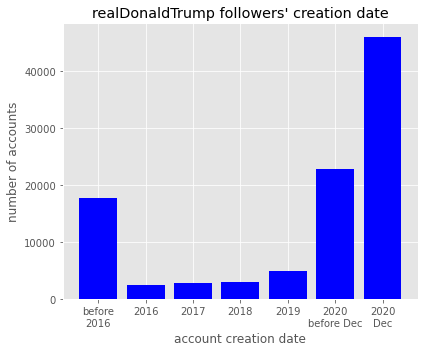

In [59]:
graph_creation_date_interval(realDonaldTrump_followers_info, 'realDonaldTrump')

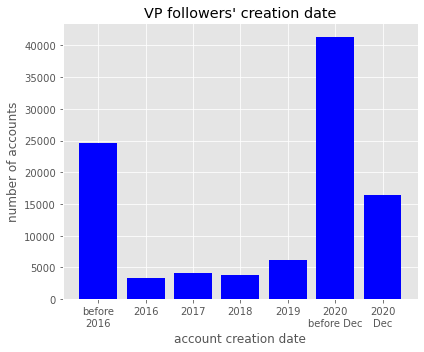

In [60]:
graph_creation_date_interval(VP_followers_info, 'VP')

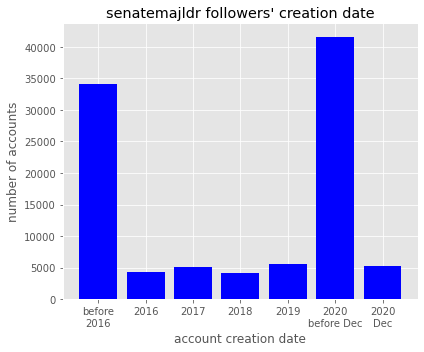

In [61]:
graph_creation_date_interval(senatemajldr_followers_info, 'senatemajldr')

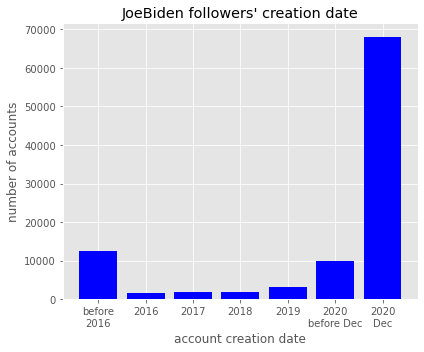

In [62]:
graph_creation_date_interval(JoeBiden_followers_info, 'JoeBiden')

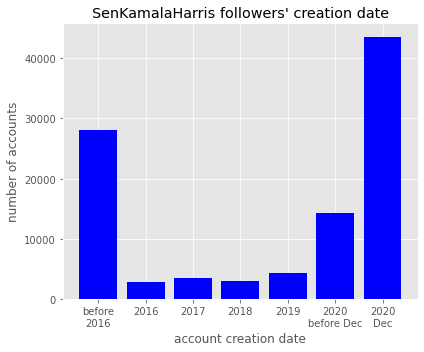

In [63]:
graph_creation_date_interval(SenKamalaHarris_followers_info, 'SenKamalaHarris')

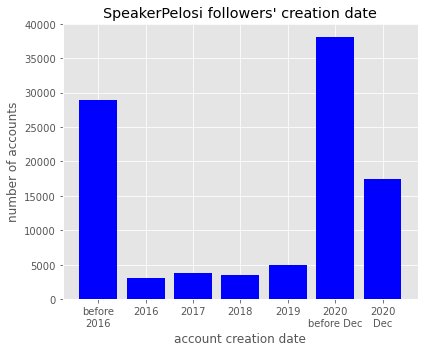

In [64]:
graph_creation_date_interval(SpeakerPelosi_followers_info, 'SpeakerPelosi')


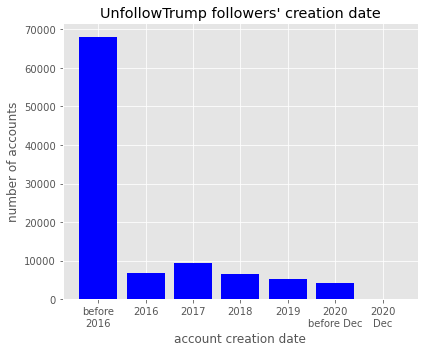

In [65]:
graph_creation_date_interval(UnfollowTrump_followers_info,'UnfollowTrump')